**Import packages**

In [1]:
!pip install pytictoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import random
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
from sklearn.model_selection import train_test_split
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 13s 0us/step


((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

**Create helper functions**

In [4]:
def plot_sample_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    plt.xlabel('Image Label: {}'.format(classes[y[index]]))

def classification_results(X_test,y_test,y_pred_classes):
  from sklearn.metrics import confusion_matrix , classification_report
  import seaborn as sn

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_classes)
  plt.figure(figsize = (7,5))
  sn.heatmap(cm, annot=True, fmt='d', cmap='Greens')
  plt.xlabel('Predicted');
  plt.ylabel('Truth');

  print("Classification Report: \n", classification_report(y_test, y_pred_classes))

def plot_fitting_history(history,filename,dpi):
  epochs = len(history.history['loss'])
  epoch_data = np.arange(1,epochs+1)
  plt.plot(epoch_data,history.history['loss'],'o-')
  plt.ylabel('Loss')
  plt.xlabel('Epoch sequence' )
  if epochs <= 60: plt.xticks(np.arange(0, epochs + 1, step=5))
  else: plt.xticks(np.arange(0, epochs + 1, step=20))
  if 'val_loss' in history.history.keys():
    plt.plot(epoch_data,history.history['val_loss'],'o--')
    plt.legend(['Training','Validation'])
  else:
    plt.legend(['Training'])
  plt.savefig(filename, dpi=dpi)
  plt.show()

**Plot sample image**

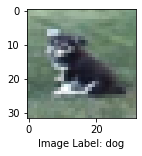

In [5]:
plot_sample_image(X_train, y_train, np.random.randint(100))

**Normalize the input data**

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Linear Classifier

**Fit the model**

In [7]:
import random
import tensorflow as tf
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

C_linear = models.Sequential([
        layers.Flatten(input_shape=X_train.shape[1:]),
        layers.Dense(10, activation='softmax'),  
    ])

C_linear.summary()

learning_rate =  0.0001
C_linear.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

t_linear = TicToc()
t_linear.tic()
early_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history_C_linear = C_linear.fit(X_train, y_train, epochs=200, batch_size=32,
            validation_split = 0.1, callbacks = early_callbacks, verbose=1)
t_linear.toc()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1407/1407 [==============================] - 10s 3ms/step - loss: 1.9914 - accuracy: 0.2918 - val_loss: 1.9024 - val_accuracy: 0.3424
Epoch 2/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8537 - accuracy: 0.3541 - val_loss: 1.8396 - val_accuracy: 0.3632
Epoch 3/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8163 - accuracy: 0.3669 - val_loss: 1.8231 - val_accuracy: 0.3750
Epoch 4/200


In [8]:
C_linear.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7261 - accuracy: 0.4032


[1.7261289358139038, 0.4032000005245209]

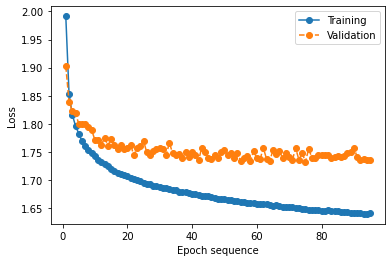

In [9]:
filename = 'Training history CIFAR10 [Linear]'+'.png'
plot_fitting_history(history_C_linear, filename, dpi = 100)

**Report classification performance & plot confusion matrix**

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.49      0.47      1000
           1       0.56      0.37      0.45      1000
           2       0.33      0.26      0.29      1000
           3       0.27      0.36      0.31      1000
           4       0.41      0.21      0.28      1000
           5       0.35      0.32      0.33      1000
           6       0.40      0.48      0.44      1000
           7       0.44      0.49      0.46      1000
           8       0.49      0.51      0.50      1000
           9       0.40      0.55      0.46      1000

    accuracy                           0.40     10000
   macro avg       0.41      0.40      0.40     10000
weighted avg       0.41      0.40      0.40     10000



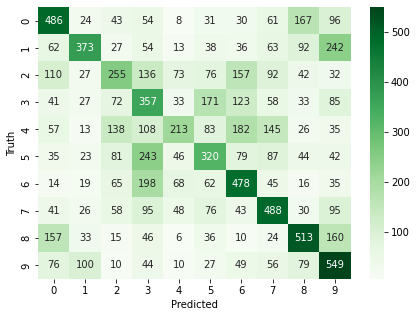

In [10]:
y_pred = C_linear.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_results(X_test,y_test,y_pred_classes)

In [11]:
C_linear.save('Linear_CIFAR10.h5')

In [12]:
from keras.models import load_model
Linear_CIFAR10 = load_model('Linear_CIFAR10.h5')

In [13]:
Linear_CIFAR10.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7261 - accuracy: 0.4032


[1.7261289358139038, 0.4032000005245209]